            Date  TempHighF  ...  PrecipitationSumInches               Events
0     12/21/2013         74  ...                    0.46  Rain , Thunderstorm
1     12/22/2013         56  ...                       0                     
2     12/23/2013         58  ...                       0                     
3     12/24/2013         61  ...                       0                     
4     12/25/2013         58  ...                       T                     
...          ...        ...  ...                     ...                  ...
1314   7/27/2017        103  ...                       0                     
1315   7/28/2017        105  ...                       0                     
1316   7/29/2017        107  ...                       0                     
1317   7/30/2017        106  ...                       0                     
1318   7/31/2017         99  ...                       0                     

[1319 rows x 21 columns]
      Unnamed: 0  TempHighF  ...  Wind

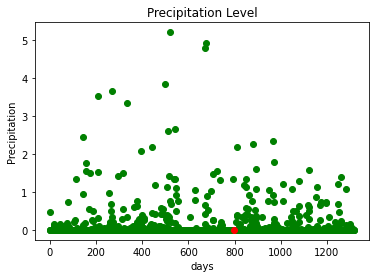

Precipitation vs Selected Atribut


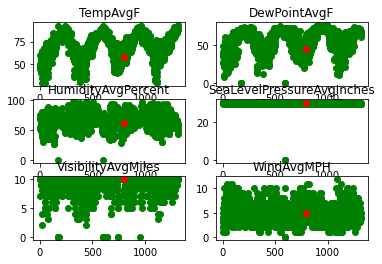

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 

from google.colab import files

#data = pd.read_csv('weather.csv')
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Coaching/weather.csv')
print(data)


#menghapus colom yang tidak digunakan
data = data.drop(['Events','Date','SeaLevelPressureHighInches','SeaLevelPressureLowInches'],axis =1)
#print(data)

data = data.replace('T',0.0)
data = data.replace('-',0.0)

#save data to final
#data.to_csv('Final_weather.csv')
data.to_csv('/content/drive/MyDrive/Colab Notebooks/Coaching/Final_weather.csv')


#data =  pd.read_csv('Final_weather.csv')
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Coaching/Final_weather.csv')
print(data)

X = data.drop(['PrecipitationSumInches'],axis=1)
Y = data['PrecipitationSumInches']
Y = Y.values.reshape(-1,1)

day_index = 798
days = [i for i in range(Y.size)]

Reg = LinearRegression()
Reg.fit(X,Y)

# Random input
inp = np.array([[40],[60],[45],[67],[51],[36],[20],[80],[64],[48],[30.06],[10],[10],[10],[15],[7],[27]])

inp = inp.reshape(1,-1)

#output of random input 
print('Precipitation of input is ', Reg.predict(inp))


print('Precipitaition trend graph :')
plt.scatter(days,Y,color='g')
plt.scatter(days[day_index],Y[day_index],color='r')
plt.title('Precipitation Level')
plt.xlabel('days')
plt.ylabel('Precipitation')
plt.show()



x_f = X.filter (['TempAvgF','DewPointAvgF','HumidityAvgPercent','SeaLevelPressureAvgInches','VisibilityAvgMiles','WindAvgMPH'],axis=1)
print('Precipitation vs Selected Atribut')


for i in range(x_f.columns.size):
    plt.subplot(3,2,i+1)
    plt.scatter(days,x_f[x_f.columns.values[i][:100]],color='g')
    plt.scatter(days[day_index],x_f[x_f.columns.values[i]][day_index],color='r')
    plt.title(x_f.columns.values[i])
plt.show()
                                    
                                    
                                    
                                    
    


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
!pip install sklearn